In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#we need to read a tab separated values (tsv file)
Core_df = pd.read_csv("ICPSR_38882/DS0001/38882-0001-Data.tsv", sep='\t')
DS2 = pd.read_csv("ICPSR_38882/DS0002/38882-0002-Data.tsv", sep='\t')
DS3 = pd.read_csv("ICPSR_38882/DS0003/38882-0003-Data.tsv", sep='\t')
DS4 = pd.read_csv("ICPSR_38882/DS0004/38882-0004-Data.tsv", sep='\t')
DS6 = pd.read_csv("ICPSR_38882/DS0006/38882-0006-Data.tsv", sep='\t')


# Part A: Introduce the data set

Find how many responded total:

In [2]:
num_respondents = {
    'Total': len(Core_df),
    'DS2': len(DS2),
    'DS3': len(DS3), 
    'DS4': len(DS4), 
    'DS6': len(DS6)
}
print(num_respondents)

{'Total': 9599, 'DS2': 1536, 'DS3': 1587, 'DS4': 1593, 'DS6': 1586}


# Part B: Characteristics of the sample

**Characteristics of sample**. Describe the sample of students and high schools in the dataset.  Summarize the distributions of 3 or more of the characteristics (variables) of the people and households.  Some interesting variables you may consider include: Days missed from school, Career Outlook, Grade Point Average, Drinking or Drug Usage, etc. You should include a graph or table for each distribution. You should create at least one graph and at least one table (DataFrame).

## Variable 1: Grades

*Which one of the following best describes your average grades in this school year? 9="A (93-100)" 8="A- (90-92)" 7="B+ (87-89)" 6="B (83-86)" 5="B- (80-82)" 4="C+ (77-79)" 3="C (73-76)" 2="C- (70-72)" 1="D (69 or below)"*

Data Cleaning:

In [3]:
Core_df['V2179'].value_counts()

V2179
 9    2322
 8    1914
 7    1356
 6    1108
-9     854
 5     744
 4     607
 3     316
 2     226
 1     152
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Current Year Grades')

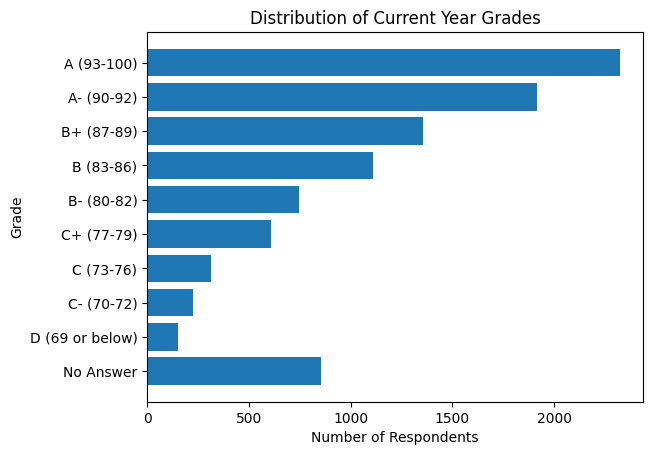

In [4]:
# Find counts for each grade category
grade_counts = Core_df['V2179'].value_counts().sort_index(ascending=False)

# Create data frame of grade frequencies
grades_df = pd.DataFrame({
    'Grades': ["A (93-100)", "A- (90-92)", "B+ (87-89)", "B (83-86)", 
               "B- (80-82)", "C+ (77-79)", "C (73-76)", "C- (70-72)", 
               "D (69 or below)", "No Answer"], 
    'Counts': grade_counts
})

# Create horizontal bar
plt.barh(grades_df['Grades'][::-1], grades_df['Counts'][::-1])
plt.xlabel('Number of Respondents')
plt.ylabel('Grade')
plt.title('Distribution of Current Year Grades')

Include No Answer for non-response bias

## Variable 2: Father Education

*What is the highest level of schooling your mother/father completed? 1="Completed grade school or less" 2="Some high school" 3="Completed high school" 4="Some college" 5="Completed college" 6="Graduate or professional school after college" 7="Don't know, or does not apply"*

In [5]:
# See what needs to be filtered out
Core_df['V2163'].value_counts().sort_index()

V2163
-9     767
 1     410
 2     979
 3    2020
 4    1053
 5    2086
 6    1203
 7    1081
Name: count, dtype: int64

[ 767  410  979 2020 1053 2086 1203 1081]


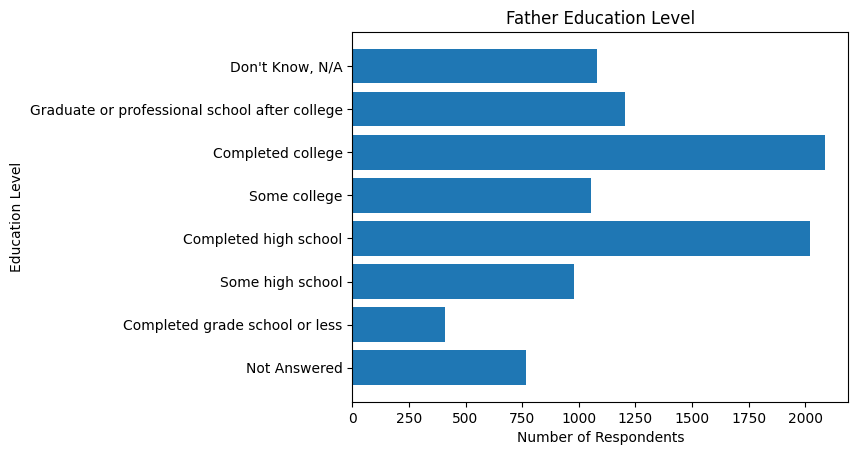

In [6]:
# Create data frames for parents' education levels
father_educ = Core_df['V2163'].value_counts().reset_index().sort_values('V2163')['count'].values
print(father_educ)

father_educ_df = pd.DataFrame({
    'Education': ["Not Answered",  "Completed grade school or less", "Some high school", 
                  "Completed high school", "Some college", "Completed college", 
                  "Graduate or professional school after college", "Don't Know, N/A"],
    'Father': father_educ
    }
)


# Create horizontal bar graph for parents' education
plt.barh(width=father_educ_df['Father'], y=father_educ_df['Education'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], father_educ_df['Education'])
plt.ylabel('Education Level')
plt.xlabel('Number of Respondents')
plt.title('Father Education Level')
plt.show()

There may be non-response bias here that causes people to not answer the question (people may not want to share that fathers have low education, or no father-figure at home).
Don't know, N/A may represent those who have no father figure at home.
Due to the large counts, its inclusion is significant.

## Variable 3: Days of School Skipped (or "Cut)

*During the LAST FOUR WEEKS, how many whole days of school have you missed . . . because you skipped or "cut"? 1="None" 2="1 Day" 3="2 Days" 4="3 Days" 5="4-5 Days" 6="6-10 Days" 7="11 or More"*

In [7]:
print(Core_df['V2176'].unique())
skipped_df = pd.DataFrame(Core_df['V2176'].value_counts()).sort_values('V2176').transpose().rename(columns={
    -9: 'Not Answered',
    1: 'None', 
    2: '1 Day', 
    3: '2 days', 
    4: '3 Days', 
    5: '4-5 Days', 
    6: '6-10 Days', 
    7: '11 or More'}).transpose().reset_index().rename(columns={
        'V2176': 'School Days Skipped (Last 4 Weeks)'
    })

skipped_df

[ 1 -9  2  3  4  7  6  5]


,School Days Skipped (Last 4 Weeks),count
0,Not Answered,1217
1,None,6051
2,1 Day,947
3,2 days,521
4,3 Days,353
5,4-5 Days,249
6,6-10 Days,117
7,11 or More,144


## Variable 4: Alcohol Lifetime

[V1204] *On how many occasions (if any) have you had alcoholic beverages to drink--more than just a few sips . . . in your lifetime? 1="0 Occasions" 2="1-2 Occasions" 3="3-5 Occasions" 4="6-9 Occasions" 5="10-19 Occasions" 6="20-39 Occasions" 7="40 or More"*

In [8]:
print('Value counts Alcohol:', Core_df['V2104'].value_counts().sort_index())

Value counts Alcohol: V2104
-9     771
 1    3434
 2    1286
 3    1016
 4     752
 5     848
 6     561
 7     931
Name: count, dtype: int64


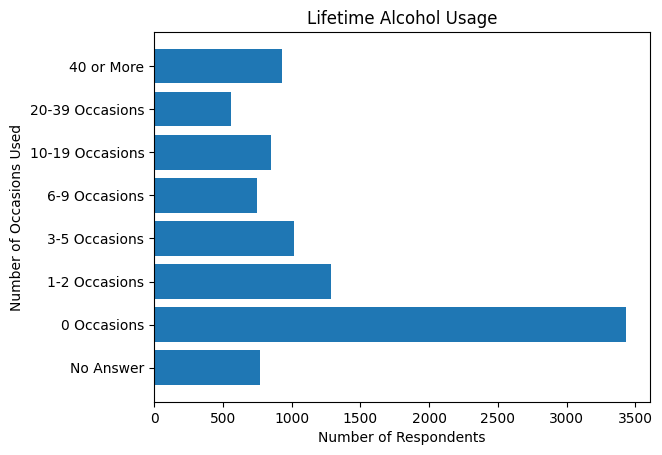

In [9]:
# Find counts for each behavior for each substance
num_alcohol_30 = Core_df['V2104'].value_counts().reset_index().sort_values('V2104')['count'].values

alc_drug_use = pd.DataFrame({
    'Frequency': ["No Answer", "0 Occasions", "1-2 Occasions", "3-5 Occasions", "6-9 Occasions","10-19 Occasions", "20-39 Occasions", "40 or More"],
    'Alcohol': num_alcohol_30
    }
)


# Create grouped bar graph
plt.barh(width=num_alcohol_30, y=alc_drug_use['Frequency'])
plt.title('Lifetime Alcohol Usage')
plt.yticks(ticks = np.arange(len(alc_drug_use['Frequency'])), labels=alc_drug_use['Frequency'])
plt.ylabel('Number of Occasions Used')
plt.xlabel('Number of Respondents')
plt.show()

Here we include missing values because they may indicate alcohol usage due non-response bias. 

## Part C: Relationships Between Variables

### Gender and 4-Year College Outlook

[V2183] *How likely is it that you will do each of the following things after high school? Graduate from college (four-year program) 1="Definitely Won't" 2="Probably Won't" 3="Probably Will" 4="Definitely Will"*

Data Cleaning:

In [10]:
# Merge DS3 and Core data by respondent ID
merged_df = pd.merge(Core_df, DS3, how='right')

print('Length of DS3:', len(DS3))
print('Length of merged data:', len(merged_df))

# Clean data for 4-year college outlook
print('Value counts for outlook:', merged_df['V2183'].value_counts())
four_year_outlook = merged_df.loc[merged_df['V2183'] != -9]

# Clean data for small gender counts
print('Value counts for gender:', four_year_outlook['V2150'].value_counts())
gender_college = four_year_outlook.loc[
    (four_year_outlook['V2150'] == 1) |
    (four_year_outlook['V2150'] == 2)]

# Find proportions of male/female responses for each category
male_college = four_year_outlook.loc[four_year_outlook['V2150'] == 1][['V2183']].value_counts().reset_index().sort_values('V2183')['count'].values
female_college = four_year_outlook.loc[four_year_outlook['V2150'] == 2][['V2183']].value_counts().reset_index().sort_values('V2183')['count'].values
male_proportions = male_college / (male_college + female_college) 

Length of DS3: 1587
Length of merged data: 1587
Value counts for outlook: V2183
 4    743
 3    353
 1    204
 2    146
-9    141
Name: count, dtype: int64
Value counts for gender: V2150
 2    706
 1    663
 4     59
 3     15
-9      3
Name: count, dtype: int64


Data Visualization: 

[0.60869565 0.57352941 0.49107143 0.43197756]
[0.39130435 0.42647059 0.50892857 0.56802244]
[1 2 4 3]


Text(0.5, 1.0, '4-Year College Completion Outlook')

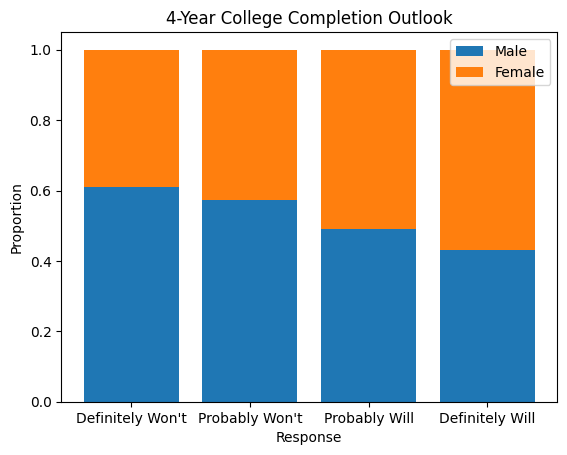

In [11]:
# Find proportions of male/female responses for each category
male_college = four_year_outlook.loc[four_year_outlook['V2150'] == 1][['V2183']].value_counts().reset_index().sort_values('V2183')['count'].values
female_college = four_year_outlook.loc[four_year_outlook['V2150'] == 2][['V2183']].value_counts().reset_index().sort_values('V2183')['count'].values

male_proportions = male_college / (male_college + female_college) 
print(male_proportions)

female_proportions = 1 - male_proportions
print(female_proportions)

# Create stacked bar graph
print(four_year_outlook['V2183'].unique())
plt.bar(x=[1, 2, 3, 4], height=male_proportions,
        label='Male')
plt.bar(x=[1, 2, 3, 4], height=female_proportions, 
        bottom=male_proportions, label='Female')
plt.legend(loc='best')
plt.xticks([1, 2, 3, 4], ["Definitely Won't", "Probably Won't", 'Probably Will', 'Definitely Will'])
plt.xlabel('Response')
plt.ylabel('Proportion')
plt.title("4-Year College Completion Outlook")


Credit: ChatGPT was used to learn how to use the `plt.bar(bottom=)` argument to create a stacked bar graph. 
No code was copied; I only learned by following a simple example.

### Environmental Consciousness ('Green Score') and Gender

Using survey responses related to the environment, I calculated a 'Green Score' column that measures how environmentally friendly people are.
Behavior such as transit use , diet, and opinions related to the environment are used

The next questions are about climate change and the environment. How much do you agree or disagree with each statement below?

- [V3649] Government should take steps to deal with climate change problems, even if it means that most of us pay higher prices or taxes. 1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree" -8="R assigned BLUE" Note: Some data are missing due to question randomization. Please see RANDOM_GROUP in the codebook for details.
 
- [V3650] I would prefer to pay more money for things that will last a long time, rather than have them cost less and break. 1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree" -8="R assigned BLUE" Note: Some data are missing due to question randomization. Please see RANDOM_GROUP in the codebook for details.

- [V3651] I would be willing to (or already do) eat less or no meat. 1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree" -8="R assigned BLUE" Note: Some data are missing due to question randomization. Please see RANDOM_GROUP in the codebook for details.

- [V3652] I would be willing to (or already do) use a bicycle or mass transit (if available) rather than a car. 1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree" -8="R assigned BLUE" Note: Some data are missing due to question randomization. Please see RANDOM_GROUP in the codebook for details.

- [V3653] Climate change is a serious threat to our future. 1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree" -8="R assigned BLUE" Note: Some data are missing due to question randomization. Please see RANDOM_GROUP in the codebook for details.*

Data Cleaning:

In [12]:
# Find and filter out missing data
print('Unique values for responses:', DS4['V3649'].unique())

clean_DS4 = DS4.loc[
    (DS4['V3649'] != -9) & (DS4['V3649'] != -8) &
    (DS4['V3650'] != -9) & (DS4['V3650'] != -8) &
    (DS4['V3651'] != -9) & (DS4['V3651'] != -8) &
    (DS4['V3652'] != -9) & (DS4['V3652'] != -8) &
    (DS4['V3653'] != -9) & (DS4['V3653'] != -8)]

print('Length of original data:', len(DS4))
print('Length of clean data:', len(clean_DS4))


# Merge relevant form with core data, keep only relevant variables
DS4_merged = pd.merge(clean_DS4, Core_df, how='inner')
print('Length of merged clean data:', len(DS4_merged))


# Check that 'missing' -9 & -8 values not in clean data
print('Min value:', min(DS4_merged['V3649']))
print('Min value:', min(DS4_merged['V3650']))
print('Min value:', min(DS4_merged['V3651']))
print('Min value:', min(DS4_merged['V3652']))
print('Min value:', min(DS4_merged['V3653']))

    
# Create green_score function 
def green_score(df):
    """
    Creates a data frame copy including a Green Score column. The max Green
    score is 20. Green Score is based on environmental questions. Higher scores
    indicate higher environmental consciousness. 
    """
    # Do not grant points for those who 'Disagree'. Shift all values down 1 unit
    green_score = ((df['V3649']-1 )+ (df['V3650']-1) + (df['V3651']-1) + (df['V3652']-1) + (df['V3653']-1))
    df['Green Score'] = green_score
    return df

# Create new data frame including Green Score
DS4_green = green_score(DS4_merged)

# Clean data for gender
DS4_green_sex = DS4_green.loc[(DS4_green['V2150'] == 1) | (DS4_green['V2150'] == 2)]
print('Unique values for gender:', DS4_green_sex['V2150'].unique())


Unique values for responses: [ 3  1 -8  4  2 -9  5]
Length of original data: 1593
Length of clean data: 781
Length of merged clean data: 781
Min value: 1
Min value: 1
Min value: 1
Min value: 1
Min value: 1
Unique values for gender: [1 2]


There are too few observations for non-male and non-female gender identities, so we do not include them. If we wanted to compare, we would need approximately equal sample sizes for each category.

Data Visualization:

Text(0.5, 1.0, 'Mean Green Score by Gender')

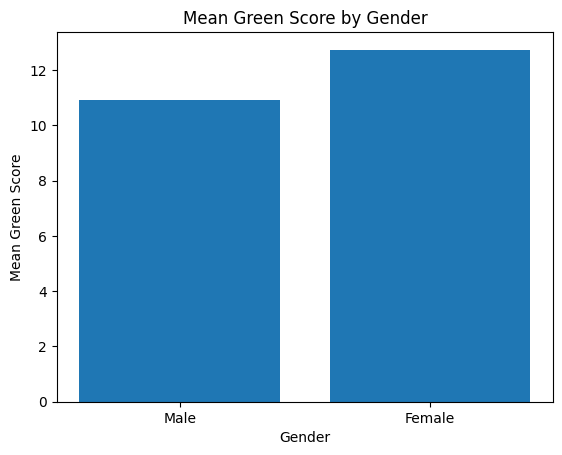

In [13]:
# Create data frame for mean Green Score by gender
green_score_sex_mean = DS4_green_sex.groupby('V2150')[['Green Score']].mean().reset_index()


# Create Bar graph for mean Green Score by gender
plt.bar(green_score_sex_mean['V2150'], height=green_score_sex_mean['Green Score'])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Mean Green Score')
plt.title('Mean Green Score by Gender')

### Environmental Consciousness ('Green Score') and Grades

Data Visualization:

In [14]:
# Create a data frame for mean Green Score by grades earned
green_score_sex_mean = DS4_green.groupby('V2179')[['Green Score']].mean().reset_index()
green_score_sex_mean

,V2179,Green Score
0,-9,11.510204
1,1,11.307692
2,2,10.444444
3,3,11.555556
4,4,11.306122
5,5,11.615385
6,6,11.877551
7,7,11.833333
8,8,11.617284
9,9,12.569307


Text(0.5, 1.0, 'Mean Green Score by Grades Earned')

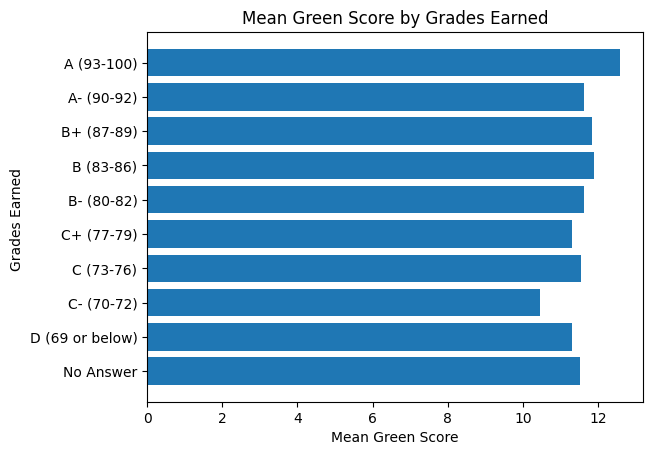

In [15]:
# Create bar graph for mean Green Scores for grades
plt.barh(width=green_score_sex_mean['Green Score'], y=["A (93-100)", "A- (90-92)", "B+ (87-89)", 
                                                           "B (83-86)", "B- (80-82)", "C+ (77-79)", 
                                                           "C (73-76)", "C- (70-72)", "D (69 or below)", 
                                                           "No Answer"][::-1])

plt.xlabel('Mean Green Score')
plt.ylabel('Grades Earned ')
plt.title('Mean Green Score by Grades Earned')